In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# First step is to initialize the Hands class an store it in a variable
mp_hands = mp.solutions.hands

# Now second step is to set the hands function which will hold the landmarks points
#hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.3)

# Last step is to set up the drawing function of hands landmarks on the image
mp_drawing = mp.solutions.drawing_utils

# Landmarks map
<img src=https://google.github.io/mediapipe/images/mobile/hand_landmarks.png />

In [4]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
        while cap.isOpened():
            ret, frame = cap.read()

            # BGR 2 RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Set flag
            image.flags.writeable = False

            # Detections
            results = hands.process(image)
            
            # Set flag to true
            image.flags.writeable = True

            # RGB 2 BGR
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


            # Rendering results
            if results.multi_hand_landmarks:
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                            mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                             )
           


            cv2.imshow('Hand Tracking', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

In [28]:
print(
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.WRIST],
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP],
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP],
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.RING_FINGER_MCP],
results.multi_hand_landmarks[0].landmark[mp_hands.HandLandmark.PINKY_MCP])


x: 0.35631707310676575
y: 0.856094241142273
z: 1.9702741838045768e-07
 x: 0.38324958086013794
y: 0.6946168541908264
z: -0.006600108463317156
 x: 0.4051724076271057
y: 0.7188384532928467
z: -0.008479772135615349
 x: 0.4220768213272095
y: 0.7471068501472473
z: -0.009994679130613804
 x: 0.4342997074127197
y: 0.774654746055603
z: -0.01145609188824892



In [5]:
num_coords = len(results.multi_hand_landmarks[0].landmark)
num_coords

21

In [6]:
landmarks = ['frame']
for val in range( num_coords):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val) ]
    
    
print(landmarks, len(landmarks))

['frame', 'x0', 'y0', 'z0', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4', 'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8', 'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11', 'z11', 'x12', 'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14', 'x15', 'y15', 'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18', 'y18', 'z18', 'x19', 'y19', 'z19', 'x20', 'y20', 'z20'] 64


In [ ]:
data_file = 'coords_of_shape.csv'

with open(data_file,mode='w', newline='') as f: 
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [47]:
files = ['word_h0_05']
#classes = ['shape_00','shape_01','shape_02','shape_03','shape_04','shape_05','shape_06','shape_07'] #put the names of the files here

In [48]:
for file in files:
    # Load Video
    fn = file
    cap = cv2.VideoCapture(f'{fn}.mp4')
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    size = (frame_width, frame_height)
    marked_video = cv2.VideoWriter(r'C:\Users\hagar\OneDrive - mail.tau.ac.il\Desktop\Stage\LPC_2022\Automatic LPC recognition/{fn}_marked.avi',cv2.VideoWriter_fourcc(*'MJPG'),30, size)

#cap = cv2.VideoCapture(r"C:\Users\hagar\OneDrive - mail.tau.ac.il\Desktop\Stage\LPC_2022\Automatic LPC recognition\word_h0_01.mp4")
    # get the FPS number
    fps = cap.get(cv2.CAP_PROP_FPS) # not sure that this is the right way to put it in the loop

    rows = []
    n = 0
    df = pd.DataFrame()
    with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            n += 1
            # BGR 2 RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Set flag
            image.flags.writeable = False

            # Detections
            results = hands.process(image)

            # Set flag to true
            image.flags.writeable = True

            # RGB 2 BGR
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            

            # Rendering results
            if results.multi_hand_landmarks:
                for num, hand in enumerate(results.multi_hand_landmarks):
                    mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                            mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                             )

            # Export coordinates

            try:
                # Extract Pose landmarks
                hand = results.multi_hand_landmarks[0].landmark
                if hand is not None:
                    hand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in hand]).flatten())
                    row = hand_row


                    # Append number of frame 
                    row.insert(0, n)
                    df_row = pd.DataFrame(row).T
                    df_row.columns = landmarks
                    if df_row is not None:
                    #write the coords to df
                        df = pd.concat([df,df_row])

                # Write prediction on the video
                font = cv2.FONT_HERSHEY_SIMPLEX

                # Get status box on the top left corner
                cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)

                # Display Class
                # cv2.putText(image, 'Predicted Position'
                #              , (95,12), font, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                # cv2.putText(image, str(predicted_position)
                #              , (90,40), font, 1, (255, 255, 255), 2, cv2.LINE_AA)


                # Display Probability
                # cv2.putText(image, 'PROB'
                            # , (15,12), font, 0.5, (0, 0, 0), 1, cv2.LINE_AA)


                # cv2.putText(image, prob_to_display
                            # , (10,40), font, 1, (255, 255, 255), 2, cv2.LINE_AA)



                # Export to CSV
                #with open(data_file, mode='a', newline='') as f:
                 #   csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                  #  csv_writer.writerow(row)

            except Exception as e:
                print(e)
                pass

            cv2.imshow('hand_estimation', image)
            marked_video.write(image)


            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    print(f'{file} was learned, fps = {fps}')
    
    marked_video.release()
    cap.release()
    cv2.destroyAllWindows()

            


'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
word_h0_05 was learned, fps = 30.369630369630368


In [37]:
df

,frame,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,9.0,0.421780,0.971312,-5.357556e-08,0.425306,0.925655,0.017498,0.434635,0.906845,0.035116,...,0.049637,0.461856,0.980544,0.067220,0.463390,0.975484,0.077782,0.464906,0.970320,0.085940
0,13.0,0.382619,0.858366,5.856099e-08,0.377449,0.816410,0.008049,0.382691,0.778912,0.010838,...,0.001202,0.433883,0.796947,0.006399,0.439424,0.781481,0.011192,0.443031,0.768917,0.014650
0,14.0,0.379861,0.844543,1.041848e-07,0.369403,0.804785,0.003448,0.371558,0.764524,0.005006,...,0.003468,0.429484,0.769627,0.008105,0.434696,0.752685,0.010535,0.437999,0.738148,0.011836
0,15.0,0.379427,0.827958,1.069937e-07,0.365644,0.789828,0.000100,0.364392,0.749878,-0.000588,...,-0.002299,0.426056,0.742882,-0.000215,0.430149,0.725097,0.001397,0.432692,0.710246,0.002416
0,16.0,0.378299,0.813068,1.177424e-07,0.363673,0.774661,0.001056,0.359827,0.736920,0.000040,...,-0.002678,0.422509,0.724418,-0.000064,0.426009,0.705947,0.001974,0.428714,0.690134,0.003131
0,17.0,0.378241,0.801950,1.059067e-07,0.363296,0.763832,0.001692,0.357401,0.727010,0.000764,...,-0.003131,0.421039,0.708511,-0.001191,0.424582,0.688890,0.000450,0.427616,0.671092,0.001367
0,18.0,0.380075,0.793110,9.900910e-08,0.363465,0.756394,0.002205,0.355669,0.719608,0.002043,...,-0.000772,0.419287,0.697048,0.002018,0.422210,0.678052,0.003610,0.424729,0.660712,0.004286
0,19.0,0.380670,0.787323,9.227822e-08,0.363010,0.750027,0.004467,0.355373,0.714464,0.004859,...,0.000874,0.418485,0.687947,0.005502,0.421298,0.668866,0.008121,0.423932,0.651621,0.009324
0,20.0,0.381001,0.782676,8.611033e-08,0.363851,0.746650,0.004249,0.355694,0.712333,0.004299,...,-0.001591,0.418596,0.681441,0.002457,0.421215,0.662674,0.004771,0.423068,0.646254,0.005732
0,21.0,0.382105,0.780583,6.804315e-08,0.365226,0.745455,0.005385,0.357351,0.711530,0.005569,...,-0.004543,0.418796,0.679216,-0.001143,0.421378,0.660049,0.001173,0.423270,0.643580,0.002303


once we get the df out of the video:

In [49]:

palm_landmarks = ['0','1','5','9','13','17']
# palm_landmarks = ['8']
palm_cols = ['frame']
cords = ['x','y','z']
for i in palm_landmarks:
    for v in cords:
        palm_cols.append(v+i)
        


In [50]:
df_palm = df.filter(palm_cols, axis=1)

print(len(df_palm),fps)

70 30.369630369630368


In [51]:
# add coords of hand center 

x_cols = []
y_cols = []
z_cols = []

for col in palm_cols:
    if col[0] == 'x':
        x_cols.append(col)
    elif col[0] == 'y':
        y_cols.append(col)
    elif col[0] == 'z':
        z_cols.append(col)
    
df_x = df_palm.filter(x_cols, axis=1)
df_y = df_palm.filter(y_cols, axis=1)
df_z = df_palm.filter(z_cols, axis=1)


df_palm['x_center'] = df_x.mean(axis=1)
df_palm['y_center'] = df_y.mean(axis=1)
df_palm


,frame,x0,y0,z0,x1,y1,z1,x5,y5,z5,...,y9,z9,x13,y13,z13,x17,y17,z17,x_center,y_center
0,5.0,0.358864,0.987784,4.800198e-08,0.354088,0.919960,0.010219,0.385995,0.834972,-0.004053,...,0.866145,-0.012310,0.423877,0.900285,-0.019399,0.435245,0.935542,-0.024985,0.394194,0.907448
0,6.0,0.349657,0.954967,1.014054e-07,0.342894,0.887750,0.010652,0.378097,0.796617,-0.002528,...,0.826556,-0.008547,0.419117,0.858943,-0.012816,0.431061,0.893676,-0.015499,0.387137,0.869751
0,7.0,0.348824,0.925296,7.476844e-08,0.338977,0.853049,0.011881,0.372786,0.761737,0.003892,...,0.789213,-0.001461,0.415833,0.820253,-0.005097,0.428129,0.853743,-0.007251,0.383699,0.833882
0,8.0,0.350150,0.896658,1.157893e-07,0.337412,0.824103,0.009642,0.371240,0.738228,0.005314,...,0.761451,-0.000450,0.414402,0.789954,-0.005252,0.427446,0.821394,-0.008986,0.382719,0.805298
0,9.0,0.348112,0.874413,8.106289e-08,0.335650,0.806053,0.015523,0.369242,0.713593,0.007808,...,0.734834,-0.000121,0.412247,0.762461,-0.006408,0.425126,0.794976,-0.011048,0.380717,0.781055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,70.0,0.338984,0.976292,-2.522740e-07,0.319007,0.908000,0.017789,0.361569,0.829261,0.016658,...,0.849048,0.013949,0.402313,0.871831,0.013763,0.412118,0.899628,0.015452,0.369988,0.889010
0,71.0,0.348281,1.009841,-3.398783e-07,0.328273,0.945557,0.008806,0.373939,0.869227,0.003081,...,0.891545,-0.000270,0.411237,0.915829,-0.002009,0.420071,0.940462,-0.002653,0.379643,0.928744
0,72.0,0.362153,1.057507,-2.767584e-07,0.340033,0.994511,0.006641,0.380891,0.917239,0.004013,...,0.938501,0.003898,0.419686,0.960167,0.005136,0.428442,0.983679,0.007147,0.389176,0.975267
0,73.0,0.364423,1.090092,-2.488835e-07,0.344007,1.035912,-0.000900,0.389080,0.960124,-0.004266,...,0.977517,0.000122,0.423043,0.993842,0.005442,0.429993,1.010202,0.010975,0.393390,1.011282


In [280]:

vel = []
index =[]
for i in range (n_rows-1):
    df_vel = df.iloc[i+1] - df.iloc[i]
    index.append(df['frame'].iloc[i])

    s = 0
    for j in range (1,len(df_vel)):
        s+= df_vel[j]**2
    vel.append(s)
    
print(vel)   


plt.plot(index, vel, label = 'v_x')

from scipy.ndimage import gaussian_filter1d
gaussian_filter1d([1.0, 2.0, 3.0, 4.0, 5.0], 1)
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

y3 = gaussian_filter1d(vel, 3)
plt.plot(index,vel, '--', label='original data')
plt.plot(index,y3, 'k', label='filtered, sigma=2')
plt.legend()
plt.grid()
plt.show()


from peakdetect import peakdetect

peaks = peakdetect(list(y3), lookahead=5) 
print(peaks)
# Lookahead is the distance to look ahead from a peak to determine if it is the actual peak. 
# Change lookahead as necessary 
higherPeaks = np.array(peaks[0])
lowerPeaks = np.array(peaks[1])
plt.plot(y3)
plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')
plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ko')
print(lowerPeaks)


IndexError: single positional indexer is out-of-bounds

In [272]:
l = [24,44,67]

onsetes = {}

for i in range(0,len(l)):
    x = l[i]/fps
    onsetes[f'{i}'] = f'time {x}'
    
onsetes

{'0': 'time 0.7940135593220339',
 '1': 'time 1.4556915254237288',
 '2': 'time 2.216621186440678'}

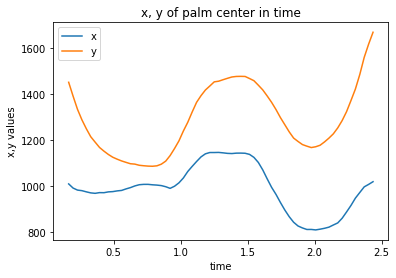

In [52]:
import matplotlib.pyplot as plt
# Plot x, y center as a function to frame number
frame = df_palm['frame']
time = frame/fps # to have it in seconds
# x = df_palm['x_center']*2560 # get the values in pixels
# y = df_palm['y_center']*1600
x = df_palm['x_center']*2560 # get the values in pixels
y = df_palm['y_center']*1600



# naming the x axis
plt.xlabel('time')
# naming the y axis
plt.ylabel('x,y values')
# title to the graph
plt.title('x, y of palm center in time')


plt.plot(time, x, label = 'x')
plt.plot(time, y, label = 'y')


# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()







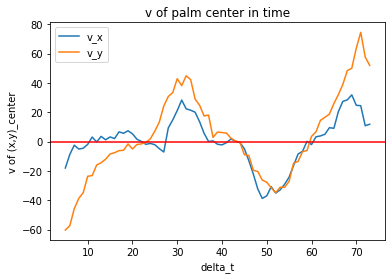

In [53]:
n_rows = len(df_palm)
v_x =[]
v_y =[]
for i in range (n_rows-1):
    v_x.append((df_palm.iloc[i+1]['x_center'] - df_palm.iloc[i]['x_center'])*2560)
    v_y.append((df_palm.iloc[i+1]['y_center'] - df_palm.iloc[i]['y_center'])*1600)
    


frame = df_palm['frame'][:-1]



plt.plot(frame, v_x, label = 'v_x')
plt.plot(frame, v_y, label = 'v_y')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()

# naming the x axis
plt.xlabel('delta_t')
# naming the y axis
plt.ylabel('v of (x,y)_center')
# title to the graph
plt.title('v of palm center in time')
# plt.xticks(range(0,60,2))    # changing x scale by own



# plt.legend()
plt.show()



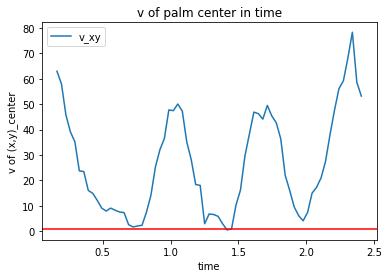

In [74]:

df_v = pd.DataFrame({'v_x':v_x, 'v_y':v_y})

def get_Vxy(x,y):
    return (np.sqrt(x**2+y**2))

df_v['v_xy'] = get_Vxy(df_v['v_x'],df_v['v_y'])
v = df_v['v_xy']
frame = df_palm['frame'][:-1]
time = frame/fps



plt.plot(time,v, label = 'v_xy')
plt.axhline(y=0.6726180077160422, color='r', linestyle='-')
plt.legend()

# naming the x axis
plt.xlabel('time')
# naming the y axis
plt.ylabel('v of (x,y)_center')
# title to the graph
plt.title('v of palm center in time')
# plt.xticks(range(0,60,2))    # changing x scale by own




plt.show()

In [19]:
!pip install scipy
!pip install peakdetect

[[16.          6.30110385]
 [36.          7.96702986]
 [55.         14.88391732]]


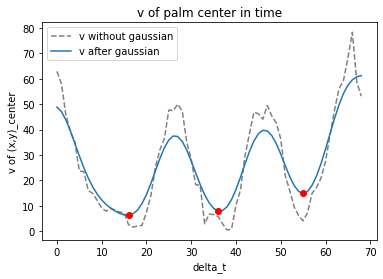

In [81]:
from scipy.ndimage import gaussian_filter1d
gaussian_filter1d([1.0, 2.0, 3.0, 4.0, 5.0], 1)

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from peakdetect import peakdetect
import numpy as np

y3 = gaussian_filter1d(v, 3)



peaks = peakdetect(list(y3), lookahead=5) 
# Lookahead is the distance to look ahead from a peak to determine if it is the actual peak. 
# Change lookahead as necessary 
lowerPeaks = np.array(peaks[1])

plt.plot(v,'--',color = 'grey',label = 'v without gaussian')
plt.plot(y3,label = 'v after gaussian')

# plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')
plt.plot(lowerPeaks[:,0], lowerPeaks[:,1], 'ro')
plt.legend()
# naming the x axis
plt.xlabel('delta_t')
# naming the y axis
plt.ylabel('v of (x,y)_center')
# title to the graph
plt.title('v of palm center in time')

print(lowerPeaks)


In [57]:
l = [16,36,55]

onsetes = {}

for i in range(0,len(l)):
    x = l[i]/fps
    onsetes[f'{i}'] = f'time {x}'
    
onsetes

{'0': 'time 0.5268421052631579',
 '1': 'time 1.1853947368421054',
 '2': 'time 1.8110197368421053'}

now, to get the specific frame for each onset:
1) devide the timeline to three equal part (see if this works for all videos, if not maybe use MFA?)
2) look for the minimum value in each part
3) creat a csv with the manual time to each onset and colums for the automatic time
4) add the time of the first onset to the first col, second to second etc.
